In [1]:
%load_ext autoreload
%autoreload 2

In [63]:
# Import all modules used
import pandas as pd
import numpy as np
from numpy import linalg as LA
from datetime import datetime
from itertools import cycle
from scipy.spatial import distance_matrix
from scipy.sparse import csgraph
import matplotlib.pyplot as plt
import analysis
import matplotlib.ticker as ticker
import matplotlib as mpl
mpl.rcParams["figure.facecolor"] = "white"
mpl.rcParams["axes.facecolor"] = "white"
mpl.rcParams["savefig.facecolor"] = "white"

In [3]:
# Import data in a sane format
# Data Ranges from 08-15-2015 00:00:00 to 07-09-2016
data = analysis.createdf("../data/environmental/PNI16_Temperature_2015-2016_V2.xlsx")
data_by_days = [data[48*i:48*i+48] for i in range(341)]

In [44]:
data_by_days[300]

,10m,30m,40m,60m,70m,80m,90m,120m,130m
2016-05-31 00:00:00,29.452,29.452,29.414,29.365,29.389,29.14,28.891,27.481,21.843
2016-05-31 00:30:00,29.452,29.452,29.414,29.265,29.115,28.593,27.899,27.53,27.382
2016-05-31 01:00:00,29.452,29.452,29.389,29.34,29.414,29.115,28.891,27.53,22.681
2016-05-31 01:30:00,29.452,29.452,29.389,29.365,29.29,28.692,28.32,27.333,23.689
2016-05-31 02:00:00,29.352,29.352,29.34,29.34,29.29,28.841,28.394,27.333,22.8
2016-05-31 02:30:00,29.452,29.452,29.365,28.518,27.702,27.505,27.456,24.557,23.328
2016-05-31 03:00:00,29.152,29.352,29.265,29.24,29.015,27.825,27.554,25.258,22.92
2016-05-31 03:30:00,29.352,29.452,29.315,29.29,29.115,27.653,27.579,25.016,22.872
2016-05-31 04:00:00,29.352,29.452,29.365,29.34,29.34,28.965,27.875,25.963,22.896
2016-05-31 04:30:00,29.452,29.452,29.389,29.115,29.015,28.394,28.196,25.72,21.939


In [4]:
ten_meter_by_days = [days['10m'].values.tolist() for days in data_by_days]

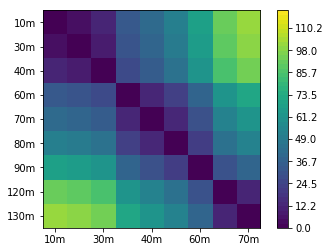

In [5]:
#Compute Distances
c1_distance_matrix = analysis.distance_matrix(data_by_days[0].T.values)
analysis.plotter(c1_distance_matrix,data.columns.tolist())

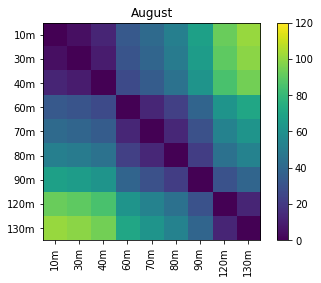

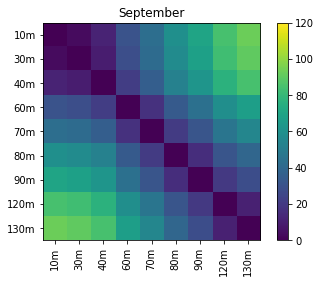

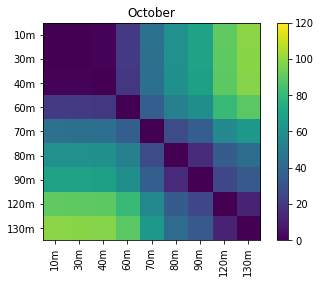

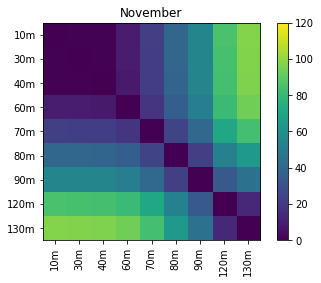

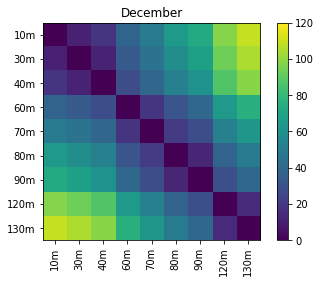

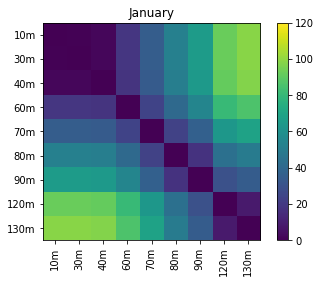

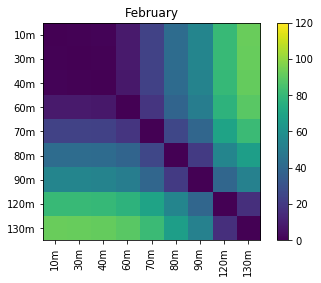

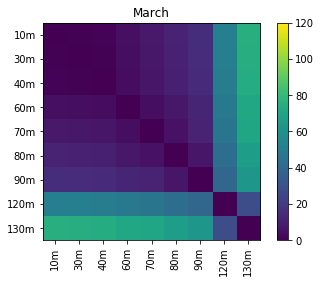

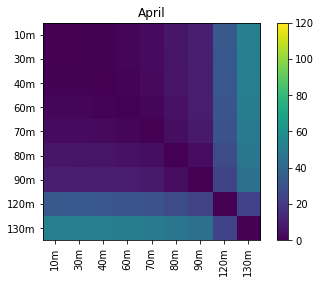

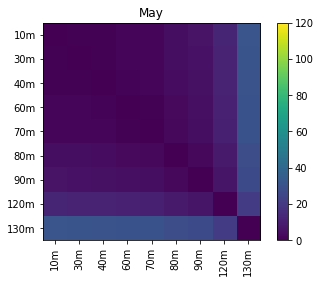

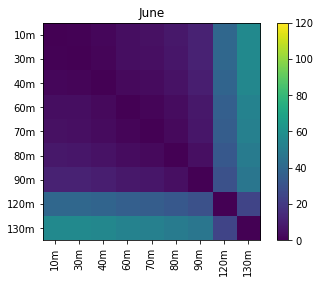

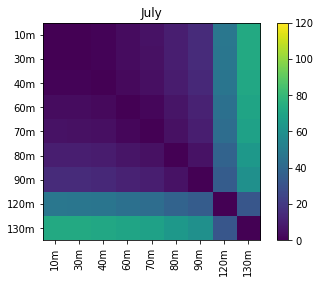

In [60]:
analysis.plotter(analysis.distance_matrix(data_by_days[0].T.values),data.columns.tolist(),"August")
analysis.plotter(analysis.distance_matrix(data_by_days[31].T.values),data.columns.tolist(),"September")
analysis.plotter(analysis.distance_matrix(data_by_days[61].T.values),data.columns.tolist(),"October")
analysis.plotter(analysis.distance_matrix(data_by_days[92].T.values),data.columns.tolist(),"November")
analysis.plotter(analysis.distance_matrix(data_by_days[122].T.values),data.columns.tolist(),"December")
analysis.plotter(analysis.distance_matrix(data_by_days[153].T.values),data.columns.tolist(),"January")
analysis.plotter(analysis.distance_matrix(data_by_days[184].T.values),data.columns.tolist(),"February")
analysis.plotter(analysis.distance_matrix(data_by_days[213].T.values),data.columns.tolist(),"March")
analysis.plotter(analysis.distance_matrix(data_by_days[244].T.values),data.columns.tolist(),"April")
analysis.plotter(analysis.distance_matrix(data_by_days[274].T.values),data.columns.tolist(),"May")
analysis.plotter(analysis.distance_matrix(data_by_days[305].T.values),data.columns.tolist(),"June")
analysis.plotter(analysis.distance_matrix(data_by_days[335].T.values),data.columns.tolist(),"July")

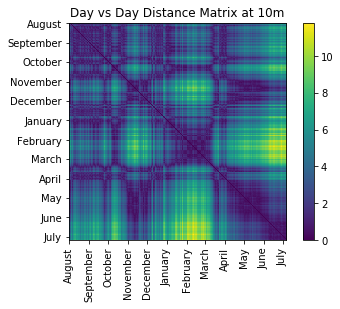

In [74]:
fig = plt.figure()
ax = fig.add_subplot(111)
cax = ax.imshow(ten_meter_distances, interpolation='nearest')
fig.colorbar(cax)
ax.set_title("Day vs Day Distance Matrix at 10m")
ax.xaxis.set_major_locator(ticker.FixedLocator([0,31,61,92,122,153,184,213,244,274,305,335]))
ax.yaxis.set_major_locator(ticker.FixedLocator([0,31,61,92,122,153,184,213,244,274,305,335]))
ax.set_yticklabels(["August","September","October","November","December","January","February","March","April","May","June","July"])
ax.set_xticklabels(["August","September","October","November","December","January","February","March","April","May","June","July"])
plt.xticks(rotation='vertical')
plt.show()

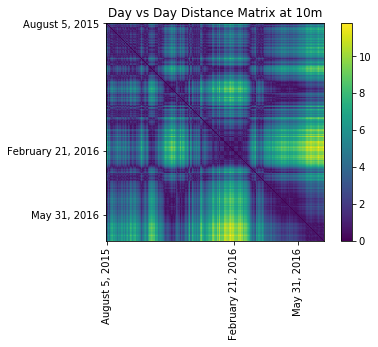

In [71]:
#ten_meter_distances = analysis.distance_matrix(ten_meter_by_days)
fig = plt.figure()
ax = fig.add_subplot(111)
cax = ax.imshow(ten_meter_distances, interpolation='nearest')
fig.colorbar(cax)
ax.set_title("Day vs Day Distance Matrix at 10m")
ax.xaxis.set_major_locator(ticker.FixedLocator([0,200,300]))
ax.yaxis.set_major_locator(ticker.FixedLocator([0,200,300]))
ax.set_yticklabels(["August 5, 2015","February 21, 2016","May 31, 2016"])
ax.set_xticklabels(["August 5, 2015","February 21, 2016","May 31, 2016"])
plt.xticks(rotation='vertical')
plt.show()

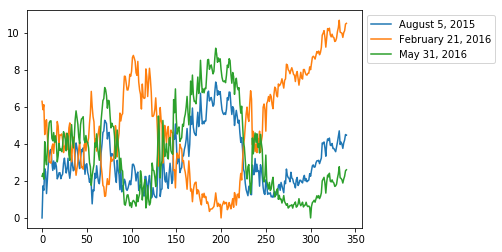

In [51]:
fig = plt.figure()
ax = plt.subplot(111)
ax.plot(ten_meter_distances[0])
ax.plot(ten_meter_distances[200])
ax.plot(ten_meter_distances[300])
ax.legend(["August 5, 2015","February 21, 2016","May 31, 2016"],bbox_to_anchor=(1,1))

#for i in range(len(ten_meter_distances)):
#    plt.plot(ten_meter_distances[i])

[[ 1.31147353e-02 -5.41538037e-02  1.67831872e-04 ... -3.48259985e-04
  -8.17654094e-04 -1.48532256e-04]
 [ 9.18653486e-03 -5.41535864e-02  1.07070977e-03 ...  4.47704677e-03
  -5.89542307e-03 -6.73918057e-03]
 [ 1.21317733e-02 -5.41529195e-02  3.80374945e-04 ...  4.95664847e-03
  -5.41655717e-04 -3.98068117e-03]
 ...
 [ 1.16725895e-01 -5.41539250e-02 -3.21921161e-02 ...  4.77967063e-05
   5.02818745e-05 -1.86513254e-05]
 [ 1.61362184e-01 -5.41538655e-02 -6.08594082e-02 ...  5.45800917e-05
   2.53216767e-05 -9.97385529e-06]
 [ 1.67918366e-01 -5.41251783e-02 -6.69325869e-02 ...  2.97920021e-05
   2.14044187e-05 -8.72494500e-06]]


(array([16951., 26826., 21530., 18000., 12510.,  9532.,  5840.,  3254.,
         1558.,   280.]),
 array([ 0.        ,  1.18100851,  2.36201702,  3.54302552,  4.72403403,
         5.90504254,  7.08605105,  8.26705955,  9.44806806, 10.62907657,
        11.81008508]),
 <a list of 10 Patch objects>)

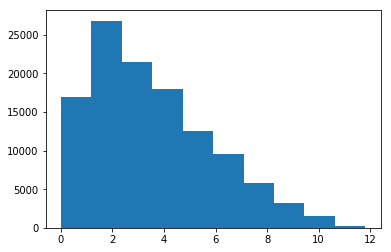

In [28]:
ten_meter_distances_laplacian = csgraph.laplacian(ten_meter_distances)
w,v = LA.eig(ten_meter_distances_laplacian)
print(v)

plt.hist(ten_meter_distances.flatten())

In [77]:
from clustergrammer_widget import Network
net = Network()

# load matrix file
net.load_df(data)

# calculate clustering
net.make_clust(dist_type='cos',views=['N_row_sum', 'N_row_var'])

net.widget()

#makani.manoa.hawaii.edu:1000

make_clust method will be deprecated in next version, please use cluster method.


IndexError: index 1467253800000000000 is out of bounds for axis 0 with size 16321